# Gain scheduling
In this notebook the topic of gain scheduling is studied.
## Preparation
Study the relevant chapters in
- "Predictive and Adaptive Control" R. Johansson 
- Chapter 9 "Adaptive Control" K.J. Åström
- [Slides from control system synthesis](http://www.control.lth.se/media/Education/DoctorateProgram/2016/Control%20System%20Synthesis/gainscheduling.pdf)

## The processes
The processes studied in this session are third order systems with two poles in $s=-0.5$ and one pole in -2.
$$P(s) = \dfrac{1}{(2s+1)^2(0.5s+1)}$$
with or without input nonlinearity.

## Installation
- First of all, you need Julia installed, see https://julialang.org/downloads/
- You also need [IJulia](https://github.com/JuliaLang/IJulia.jl#installation), which in turn requires Jupyter.
- Once Julia is up and running, the following julia code only has to be run once, it installs the relevant packages.

In [1]:
if false
    Pkg.add("GR")
    Pkg.add("ControlSystems")
    Pkg.checkout("ControlSystems","gainscheduling")
    Pkg.clone("https://github.com/JuliaGizmos/WebIO.jl")
    Pkg.checkout("Observables")
    Pkg.clone("https://github.com/JuliaGizmos/Vue.jl")
    Pkg.clone("https://github.com/JuliaGizmos/CSSUtil.jl")
    Pkg.clone("https://github.com/JuliaGizmos/InteractNext.jl")
end

The code below must be run once every time the kernel is restarted

In [2]:
using WebIO
WebIO.devsetup()
WebIO.bundlejs(watch=false)
using ControlSystems, OrdinaryDiffEq, InteractNext
gr(show=false, size=(800,400)) # Set defaults for plotting

HTML{String}("<script>/******/ (function(modules) { // webpackBootstrap\n/******/ \t// The module cache\n/******/ \tvar installedModules = {};\n/******/\n/******/ \t// The require function\n/******/ \tfunction __webpack_require__(moduleId) {\n/******/\n/******/ \t\t// Check if module is in cache\n/******/ \t\tif(installedModules[moduleId]) {\n/******/ \t\t\treturn installedModules[moduleId].exports;\n/******/ \t\t}\n/******/ \t\t// Create a new module (and put it into the cache)\n/******/ \t\tvar module = installedModules[moduleId] = {\n/******/ \t\t\ti: moduleId,\n/******/ \t\t\tl: false,\n/******/ \t\t\texports: {}\n/******/ \t\t};\n/******/\n/******/ \t\t// Execute the module function\n/******/ \t\tmodules[moduleId].call(module.exports, module, module.exports, __webpack_require__);\n/******/\n/******/ \t\t// Flag the module as loaded\n/******/ \t\tmodule.l = true;\n/******/\n/******/ \t\t// Return the exports of the module\n/******/ \t\treturn module.exports;\n/******/ \t}\n/******/\n/******/\n/******/ \t// expose the modules object (__webpack_modules__)\n/******/ \t__webpack_require__.m = modules;\n/******/\n/******/ \t// expose the module cache\n/******/ \t__webpack_require__.c = installedModules;\n/******/\n/******/ \t// identity function for calling harmony imports with the correct context\n/******/ \t__webpack_require__.i = function(value) { return value; };\n/******/\n/******/ \t// define getter function for harmony exports\n/******/ \t__webpack_require__.d = function(exports, name, getter) {\n/******/ \t\tif(!__webpack_require__.o(exports, name)) {\n/******/ \t\t\tObject.defineProperty(exports, name, {\n/******/ \t\t\t\tconfigurable: false,\n/******/ \t\t\t\tenumerable: true,\n/******/ \t\t\t\tget: getter\n/******/ \t\t\t});\n/******/ \t\t}\n/******/ \t};\n/******/\n/******/ \t// getDefaultExport function for compatibility with non-harmony modules\n/******/ \t__webpack_require__.n = function(module) {\n/******/ \t\tvar getter = module && module.__esModule ?\n/******/ \t\t\tfunction getDefault() { return module['default']; } :\n/******/ \t\t\tfunction getModuleExports() { return module; };\n/******/ \t\t__webpack_require__.d(getter, 'a', getter);\n/******/ \t\treturn getter;\n/******/ \t};\n/******/\n/******/ \t// Object.prototype.hasOwnProperty.call\n/******/ \t__webpack_require__.o = function(object, property) { return Object.prototype.hasOwnProperty.call(object, property); };\n/******/\n/******/ \t// __webpack_public_path__\n/******/ \t__webpack_require__.p = \"\";\n/******/\n/******/ \t// Load entry module and return exports\n/******/ \treturn __webpack_require__(__webpack_require__.s = 3);\n/******/ })\n/************************************************************************/\n/******/ ([\n/* 0 */\n/***/ (function(module, exports, __webpack_require__) {\n\nvar is_array = __webpack_require__(8)\nvar arrays_equal = __webpack_require__(4)\n\nfunction arrays_and_equal(arr1, arr2){\n    return is_array(arr1) && is_array(arr2) && arrays_equal(arr1, arr2)\n}\n\nvar contexts = {};\nvar obscontexts = {};\n\nfunction makeWidget(id, data, sendCallback, dom, handlers, observables)\n{\n    var ctx = {\n        type: \"context\",\n        id: id,\n        data: data,\n        sendCallback: sendCallback,\n        dom: dom,\n        handlers: handlers || {},\n        observables: observables || {},\n        promises: {}\n    }\n\n    contexts[id] = ctx;\n    if (observables){\n        Object.keys(observables).forEach(function setobscontext(name){\n            var o = observables[name]\n            if (typeof obscontexts[o.id] === \"undefined\"){\n                obscontexts[o.id] = []\n            }\n            //obname is the name of the observable in this context\n            obscontexts[o.id].push({ctx: ctx, obname: name})\n        })\n    }\n\n    return ctx;\n}\n\n\nfunction createNode(context, data, parentNode)\n{\n    var nodeType = data.nodeType;\n    return WebIO.NodeTypes[nodeType]\n           .create(context, data, 

HTML{String}("<script>(function (IPython, \$, WebIO) {\n\n    function initComm(notebook)\n    {\n        var commManager = notebook.kernel.comm_manager;\n\n        // Register a \"target\" so that Julia can create a Comm\n        // to communicate.\n        commManager.register_target(\"webio_comm\",\n            function (comm) {\n                WebIO.triggerConnected();\n                WebIO.sendCallback = function (msg) { comm.send(msg); }\n                comm.on_msg(function (msg) {\n                    WebIO.dispatch(msg.content.data);\n                });\n            }\n        );\n    }\n\n    \$(document).ready(function() {\n\n        try {\n            // try to initialize right away - note: \$.ready is async.\n            initComm(IPython.notebook);\n        } catch (e) {\n            // wait on the status_started event.\n            \$([IPython.events]).on(\n                'kernel_created.Kernel kernel_created.Session',\n                 function(event, notebook) { initComm(notebook); }\n            );\n        }\n    });\n\n})(IPython, jQuery, WebIO);\n</script>")

WebIO: setting up ijulia
yarn-v1.1.0/bin/
yarn-v1.1.0/bin/yarn.js
yarn-v1.1.0/bin/yarn
yarn-v1.1.0/bin/yarnpkg
yarn-v1.1.0/bin/yarn.cmd
yarn-v1.1.0/bin/yarnpkg.cmd
yarn-v1.1.0/lib/
yarn-v1.1.0/lib/cli.js
yarn-v1.1.0/lib/v8-compile-cache.js
yarn-v1.1.0/LICENSE
yarn-v1.1.0/package.json
yarn-v1.1.0/README.md
yarn install v1.1.0
[1/4] Resolving packages...
success Already up-to-date.
Done in 0.31s.
Hash: 72bb344ae93d31f2ce31
Version: webpack 2.7.0
Time: 229ms
          Asset    Size  Chunks             Chunk Names
webio.bundle.js  127 kB       0  [emitted]  WebIO
   [0] ./basics/webio.js 6.72 kB {0} [built]
   [1] (webpack)/buildin/global.js 509 bytes {0} [built]
   [2] ./basics/node.js 8.72 kB {0} [built]
   [3] ./index.js 74 bytes {0} [built]
   [4] ./~/array-equal/index.js 216 bytes {0} [built]
   [5] ./~/base64-js/index.js 3.47 kB {0} [built]
   [6] ./~/buffer/index.js 48.6 kB {0} [built]
   [7] ./~/ieee754/index.js 2.05 kB {0} [built]
   [8] ./~/is-array/index.js 470 bytes {0} [built]

Plots.GRBackend()

We now proceed to define the process model and some parameters for our simulation

In [3]:
P              = tf(1,[2.,1])^2*tf(1,[0.5,1])  # Process model
h              = 0.1             # Sample time (only used for plots)
Ps             = ss(P)           # State-space representation of process model
reference(t,x) = 1.;             # Reference generator (step function)

Next we define a simulation object and simulate the system with a P-controller.
- Change the value of the gain $K$ using the slider and try to get a feeling for how the system behaves.

In [4]:
s      = Simulator(Ps)
x0     = [0.,0,0] # Initial state
Tf     = 20              # Length of experiments (seconds)
t      = 0:h:Tf          # Time vector
tspan  = (0.0,Tf)


@manipulate for K = linspace(0,20,50)
    global os, sol1
    os     = OutputFeedbackSimulator(Ps,reference,e->K*e)
    sol1   = solve(os, x0, tspan, Tsit5()) # Simulate the system
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black, ylims=(0,1.5))
end

(div
  (div)
  (WebIO.Widget("context-2", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_03", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,375.813 780.315,375.813 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"365\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,375.813 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,375.813 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,375.813 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,375.813 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,375.813 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,375.813 780.315,375.813 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,254.479 780.315,254.479 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.145 780.315,133.145 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,375.813 780.315,375.813 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,375.813 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,375.813 32.2221,370.353 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,375.813 219.245,370.353 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,375.813 406.269,370.353 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,375.813 593.292,370.353 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,375.813 780.315,370.353 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,375.813 43.4435,375.813 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"s

Let's step up the game and control the system with a PID controller. Use [Ziegler–Nichols frequency method](https://en.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method) to tune a PID controller for the system. 
You can use the code above to find the critical gain. You can compare the result with a numerical root finding algorithm applied to the process model, see below
- Compare the results with manual tuning.

In [5]:
using Roots
fzero(K->maximum(real.(pole(feedback(P,tf(K))))), 1, 20)

12.499999999999998

In [6]:
conditions  = [(x,y,r) -> true]
Tf          = 20              # Length of experiments (seconds)
t           = 0:h:Tf          # Time vector
tspan       = (0.0,Tf)
x0          = [0.,0,0]

@manipulate for kp = slider(linspace(0,10,50), label="kp", value=5),
                ki = slider(linspace(0,5,50), label="ki", value=1),
                kd = slider(linspace(0,20,50), label="kd", value=5)
    controllers = [pid(kp=kp, ki=ki, kd=kd)]
    global gs, sol1, sol2
    gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions)
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, os.y(t, sol1)[:], lab="P controller")
    plot!(t, gs.y(t, sol2)[:], lab="PID controller")
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black, ylims=(0,1.5))
end

LoadError: [91mBoundsError: attempt to access 5-element Array{Float64,1} at index [1:201][39m

We now introduce gain scheduling. The following code defines two controllers and a vector of conditions that determine when to switch between the controllers. The switching conditions are allowed to be arbitrary functions of the state $x$, the output $y$ or the reference $r$. The template below implements a schedule based on a simple threshold value on the output, $y=th$. Experiment with the controller parameters of the two controllers and the scheduling signal. Anser the following questions
- Which signal is best for scheduling?
- Can you implement a controller which is both faster and has better damping than your best controller from the previous task?

In [7]:
@manipulate for kp1 = slider(linspace(0,20,50), label="kp1", value=5),
                ki1 = slider(linspace(0,5,50), label="ki1", value=1),
                kp2 = slider(linspace(0,20,50), label="kp2", value=5),
                ki2 = slider(linspace(0,5,50), label="ki2", value=1),
                kd  = slider(linspace(0,20,50), label="kd", value=5),
                th  = linspace(0,1,20)
    
    global gs
    plot(t, gs.y(t, sol2)[:], lab="PID controller")

    controllers  = [pid(kp=kp1, ki=ki1, kd=kd), pid(kp=kp2, ki=ki2, kd=kd)]
    conditions   = [(x,y,r) -> y[1] < th, (x,y,r) -> y[1] >= th]
    gs2          = GainSchedulingSimulator(Ps, reference, controllers, conditions)
    sol3         = solve(gs2, x0, tspan, Tsit5())
    plot!(t, gs2.y(t, sol3)[:], lab="Gain scheduled controller", ylims=(0,1.5))
    plot!([tspan...], [1,1], lab="Reference", l=:dash, c=:black)
    plot!([tspan...], [th, th], lab="Threshold", c=:red, l=:dash)
end

(div
  (div)
  (div)
  (div)
  (div)
  (div)
  (div)
  (WebIO.Widget("context-15", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_15", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n32.2221,377.923 780.315,377.923 780.315,11.811 32.2221,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"32\" y=\"11\" width=\"749\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  219.245,377.923 219.245,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  406.269,377.923 406.269,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  593.292,377.923 593.292,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,255.886 780.315,255.886 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,133.848 780.315,133.848 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  32.2221,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 32.2221,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  219.245,377.923 219.245,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  406.269,377.923 406.269,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  593.292,377.923 593.292,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  32.2221,377.923 43.4435,377.923 \n  \"/>\n<poly

Okay, now it's time to make it a bit harder. We now add a nonlinearity to the process input. We can play around a bit with the type of the nonlinearity, but let's start with
$$u = u_i^2 \quad \text{if}\quad  u_i > 0$$
$$u = 0.1u_i \quad \text{otherwise}$$
depicted below.

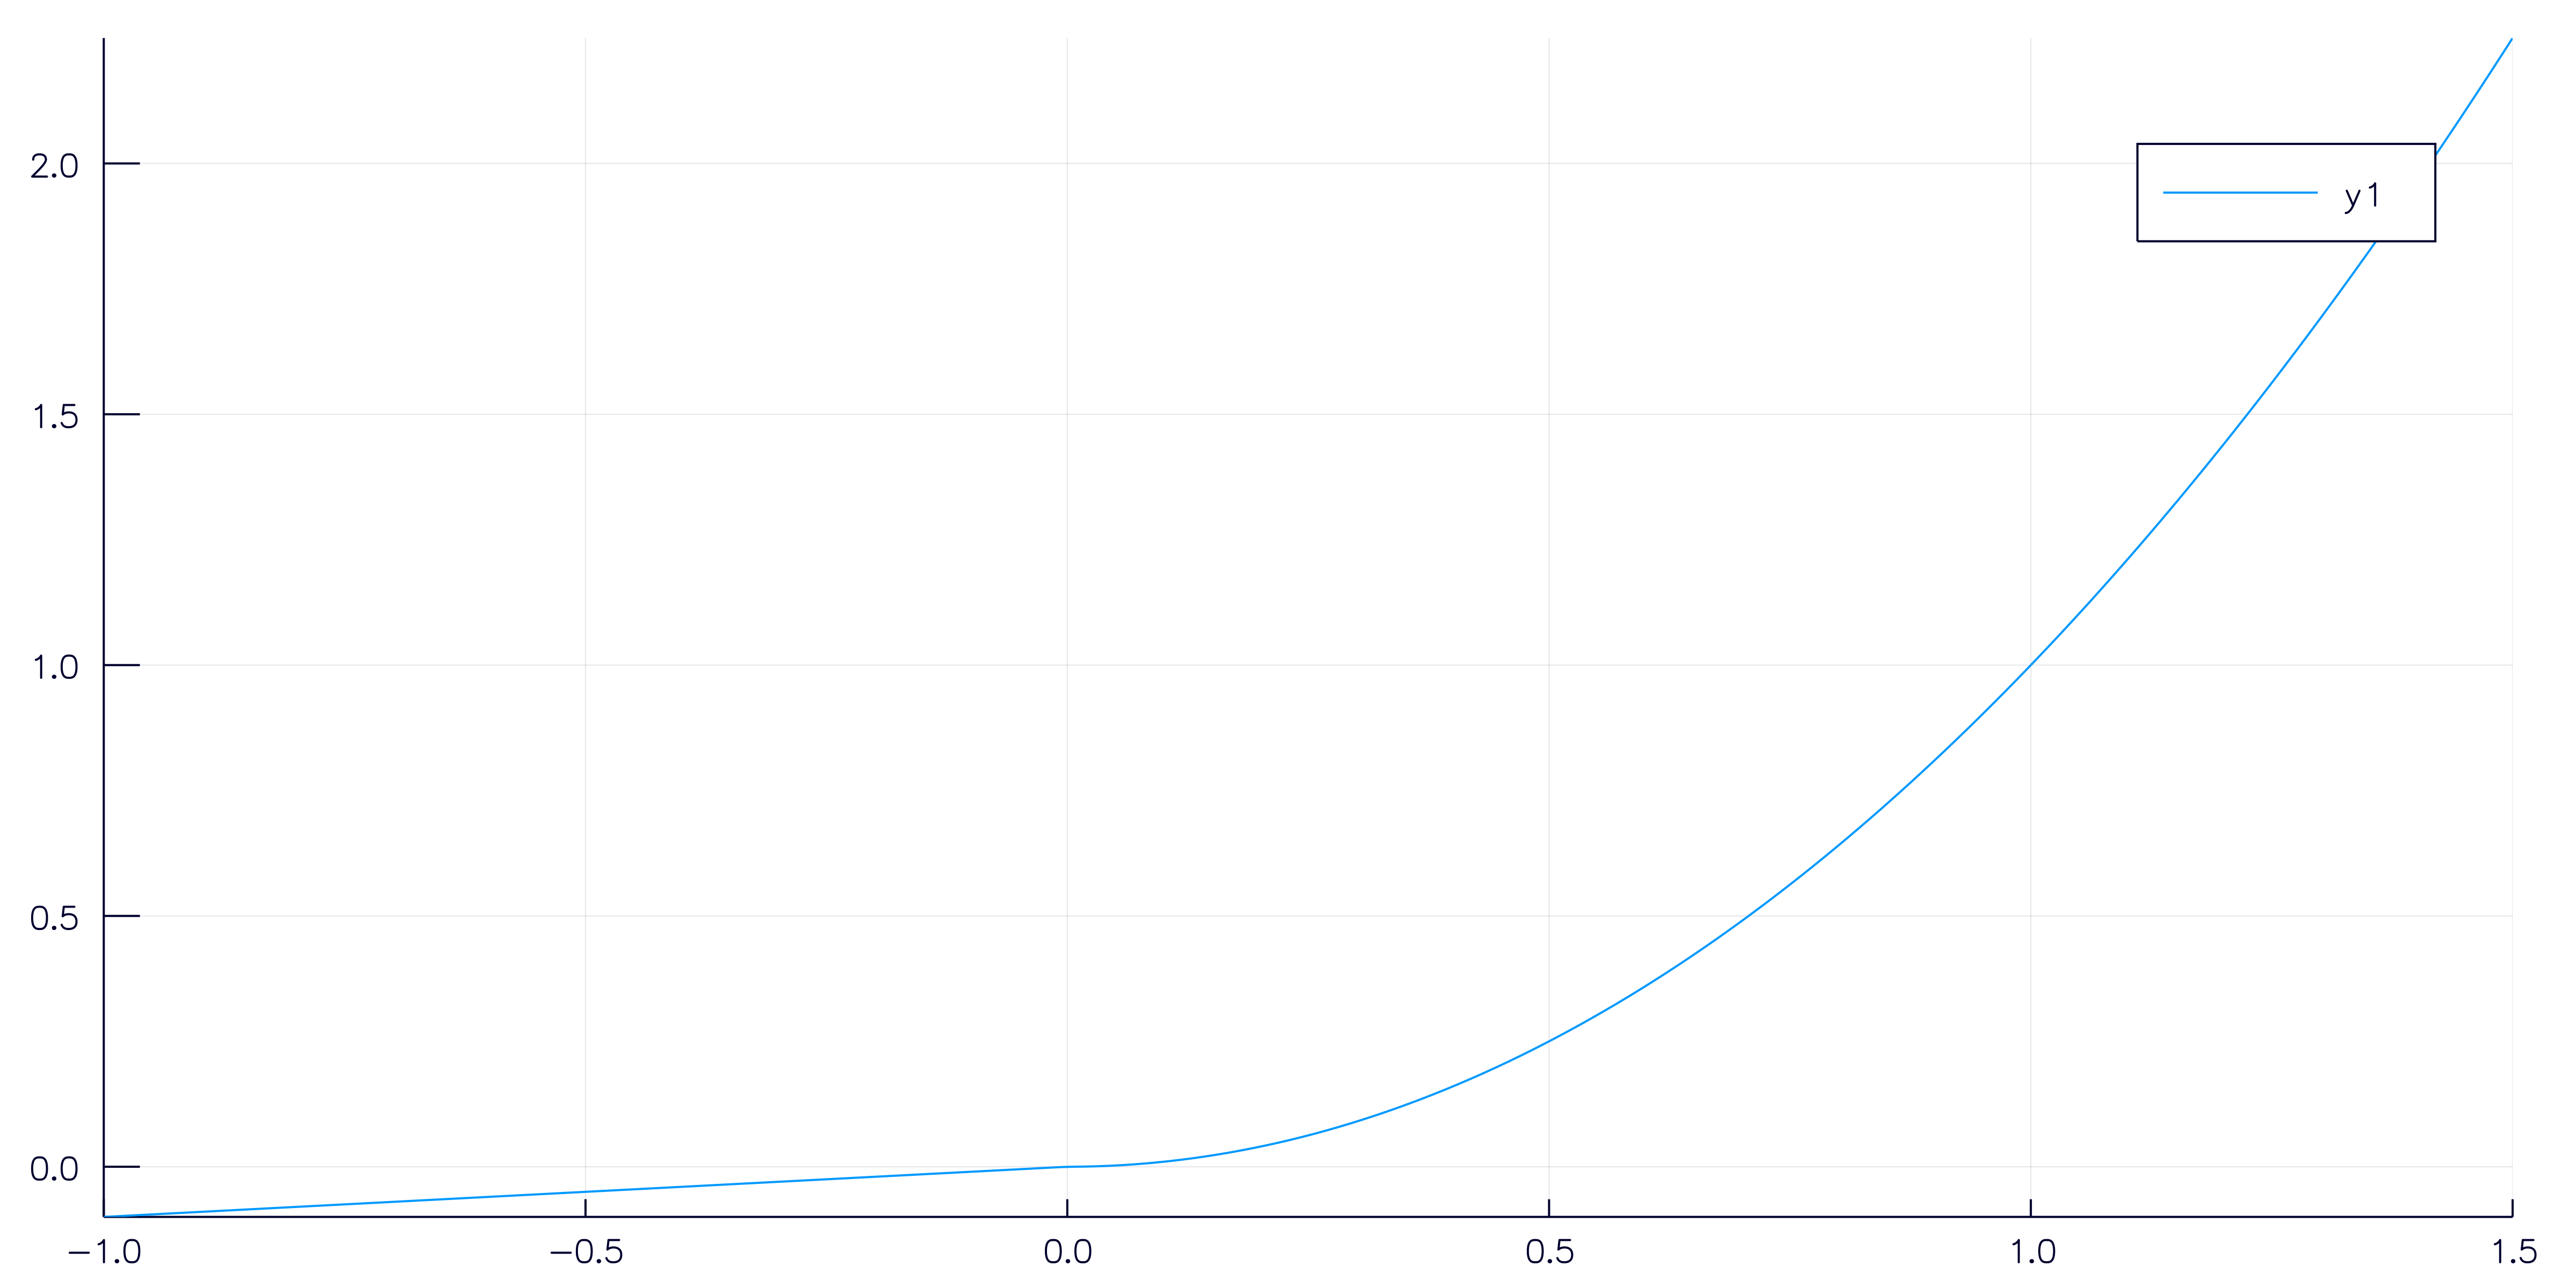

In [8]:
nonlinearity(u) = u < 0 ? 0.1u : u^2
plot(linspace(-1,1.5,200),nonlinearity)

Try tuning a P-controller for the system with the input nonlinearity. Is it possible to achieve an okay result?

In [21]:
Tf = 75.
tspan = (0.,Tf)
t = 0:h:Tf
x0 = [0,0,5/2]
conditions  = [(x,y,r) -> true]
reference(t,x) = t < Tf÷2 ? 0. : 1.
@manipulate for kp = slider(linspace(0,20,50), label="kp", value=5),
                ki = slider(linspace(0,20,50), label="ki", value=1),
                kd = slider(linspace(0,20,50), label="kd", value=1)
    global controllers
    controllers = [pid(kp=kp, ki=ki, kd=kd)]
    global gs, sol2
    gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions, inputfun=(t,u)->nonlinearity.(u))
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, gs.y(t, sol2)[:], lab="PID controller")
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,2.))
end

(div
  (div)
  (div)
  (div)
  (WebIO.Widget("context-95", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_68", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 780.315,377.923 780.315,11.811 39.1436,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"11\" width=\"742\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  286.201,377.923 286.201,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  533.258,377.923 533.258,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  780.315,377.923 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,304.701 780.315,304.701 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,231.478 780.315,231.478 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,158.256 780.315,158.256 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,85.0334 780.315,85.0334 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,11.811 780.315,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 780.315,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  286.201,377.923 286.201,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  533.258,377.923 533.258,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  780.315,377.923 780.315,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 50.2612,377.923 \n  \"/>\n<polyline clip-path=\"url(

Once again, we try a controller with gain scheduling. The left plot displays the control signal of the two controllers. You may find it necessary to add a derivative part in the controller.

In [22]:
gs    = GainSchedulingSimulator(Ps, reference, controllers, conditions, inputfun=(t,u)->nonlinearity.(u) .+ disturbance(t,0))
Tf    = 75.
tspan = (0.,Tf)
t     = 0:h:Tf
reference(t,x) = t < Tf÷3 ? 0. : 1.
disturbance(t,x) = 0 # t < 2Tf÷3 ? 0. : -1.
@manipulate for kp1 = slider(linspace(0,20,50), label="kp1", value=2),
                ki1 = slider(linspace(0,20,50), label="ki1", value=1),
                kp2 = slider(linspace(0,10,50), label="kp2", value=2),
                ki2 = slider(linspace(0,20,50), label="ki2", value=1),
                th  = linspace(0,1,20)
    
    # kp1,ki1,kp2,ki2,th = 1,1,1,1,0.5
    global sol3
    sol2  = solve(gs, x0, tspan, Tsit5())
    plot(t, gs.y(t, sol2)[:], lab="PID controller", layout=2)

    controllers  = ss.([pid(kp=kp1, ki=ki1), pid(kp=kp2, ki=ki2)])
    conditions   = [(x,y,r) -> y[1] < th, (x,y,r) -> y[1] >= th]
    gs2          = GainSchedulingSimulator(Ps, reference, controllers, conditions,
                        inputfun=(t,u)->nonlinearity.(u) .+ disturbance(t,0))
    sol3         = solve(gs2, x0, tspan, Tsit5(), reltol=1e-4, abstol=1e-4)

    # Plotting
    U  = hcat(sol3.u...)
    x  = [[u[1],u[2],u[3]] for u in sol3.u]
    u1 = controllers[1].C*U[3,:]' + controllers[1].D.*hcat((gs2.e.(sol3.t, x))...)
    u2 = controllers[2].C*U[4,:]' + controllers[2].D.*hcat((gs2.e.(sol3.t, x))...)
    plot!(t, gs2.y(t, sol3)[:], lab="Gain scheduled controller", ylims=(-0.5,2), subplot=1)
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, subplot=1)
    plot!([tspan...], [th, th], lab="Threshold", c=:red, l=:dash, subplot=1)
    plot!([u1[:] u2[:]], lab=["u_1" "u_2"], subplot=2)
end

(div
  (div)
  (div)
  (div)
  (div)
  (div)
  (WebIO.Widget("context-105", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_75", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 385.257,377.923 385.257,11.811 39.1436,11.811 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"11\" width=\"347\" height=\"367\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  154.515,377.923 154.515,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  269.886,377.923 269.886,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  385.257,377.923 385.257,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 385.257,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,304.701 385.257,304.701 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,231.478 385.257,231.478 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,158.256 385.257,158.256 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,85.0334 385.257,85.0334 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,11.811 385.257,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 385.257,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,11.811 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  154.515,377.923 154.515,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  269.886,377.923 269.886,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  385.257,377.923 385.257,372.431 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 44.3353,377.923 \n  \"/>\n<polyline

- Can you manage to get a gain scheduled controller that is better than the simple PID controller?
- Add derivative part if needed
- Add an input disturbance by uncommenting "# t < 2Tf÷3 ? 0. : -1.". Does your scheduling still work as well?
- Study the implementation of gain-scheduling. Do you notice any issues with the implementation of the gain scheduling? The implementation is available by running the code snippet below.
- How do you resolve any issues you can think of? 

In [11]:
edit(Pkg.dir("ControlSystems","src","simulators.jl"), 219)

To get a better feeling for the practicalities of gain scheduling, you'll be asked to implement a simple gain scheduled controller with interpolation below. We consider the same process and nonlinearity as above, but this time we'll implement two P-controllers and an interpolation region.
- Define two threshold values $t_1$ and $t_2$, between which you interpolate the value of the control signal requested by the two controllers.
- Figure out the equations for linear interpolation between the thresholds, you have two candidate control signals $u_1,u_2$, what is the control signal to output in the following cases, where $p$ is the scheduling signal?
    1. $p < t_1$
    2. $t_1 \leq p < t_2$
    3. $p \leq t_2$
Add the interpolation logic to the controller below.

In [23]:
Tf             = 50                 # Length of experiments (seconds)
t              = 0:h:Tf             # Time vector
reference(t,x) = t < Tf÷2 ? 0. : 1. # Reference generator (step function)
s              = Simulator(Ps)
x0             = [0.,0,5/2]         # Initial state
tspan          = (0.0,Tf)

@manipulate for K1 = linspace(0,10,50), K2 = linspace(0,5,50)

    function controller(t,x)
        y  = Ps.C*x # Form measurement signal
        e  = reference(t,x) .- y
        u1 = K1*e
        u2 = K2*e
        
        u  = (u1+u2) / 2 # Implement the interpolation here! <-----------------------------

        return u
    end
    
    s    = Simulator(Ps,(u->nonlinearity.(u)) ∘ controller)
    solg = solve(s, x0, tspan, Tsit5()) # Simulate the system
    plot(t, s.y(t, solg)[:], lab="GS controller", layout=2, subplot=1)
    plot!(t, reference.(t,0), lab="Reference", l=:dash, c=:black, ylims=(-0.5,1.5), subplot=1)
    plot!(t, [controller(t,solg(t))[] for t ∈ t], title="u", subplot=2)
end

(div
  (div)
  (div)
  (WebIO.Widget("context-114", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("obs-output", (Observables.Observable{String}("ob_79", "<?xml version=\"1.0\" encoding=\"utf-8\"?>\n<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" width=\"800\" height=\"400\" viewBox=\"0 0 800 400\">\n<defs>\n  <clipPath id=\"clip00\">\n    <rect x=\"0\" y=\"0\" width=\"800\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n0,400 800,400 800,0 0,0 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip01\">\n    <rect x=\"160\" y=\"0\" width=\"561\" height=\"400\"/>\n  </clipPath>\n</defs>\n<polygon clip-path=\"url(#clip00)\" points=\"\n39.1436,377.923 385.257,377.923 385.257,31.4961 39.1436,31.4961 \n  \" fill=\"#ffffff\" fill-opacity=\"1\"/>\n<defs>\n  <clipPath id=\"clip02\">\n    <rect x=\"39\" y=\"31\" width=\"347\" height=\"347\"/>\n  </clipPath>\n</defs>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 39.1436,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  108.366,377.923 108.366,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  177.589,377.923 177.589,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  246.812,377.923 246.812,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  316.034,377.923 316.034,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  385.257,377.923 385.257,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,377.923 385.257,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,291.316 385.257,291.316 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,204.71 385.257,204.71 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,118.103 385.257,118.103 \n  \"/>\n<polyline clip-path=\"url(#clip02)\" style=\"stroke:#00002d; stroke-width:0.333333; stroke-opacity:0.1; fill:none\" points=\"\n  39.1436,31.4961 385.257,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 385.257,377.923 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,31.4961 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  39.1436,377.923 39.1436,372.727 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  108.366,377.923 108.366,372.727 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  177.589,377.923 177.589,372.727 \n  \"/>\n<polyline clip-path=\"url(#clip00)\" style=\"stroke:#00002d; stroke-width:0.666667; stroke-opacity:1; fill:none\" points=\"\n  246.812,377.923 246.812,372.727 \n  \"/>\n<polyline clip-path=\"ur

You can add sliders for $t_1$ and $t_2$ to make experimentation faster.
- Which signal is your preferred choice of scheduling signal?

Tuning a gain schedule and the parameters of the scheduled controllers can become very tedious. Even more so it the process time constant is long and one does not have a simulator. A more systematic apporach is to linearize the system around two different operating points and design a well-damped controller for both linear systems. One then chooses a threshold somewhere between the operating points. Linearize the system around two operating points, you can do this either manually or with the help of the computer. The process model on statespace form is given by:

In [13]:
Ps

StateSpace:
A = 
          x1      x2      x3 
  x1   -3.0    -1.125  -0.5  
  x2    2.0     0.0     0.0  
  x3    0.0     0.5     0.0  
B = 
         u1 
  x1   1.0  
  x2   0.0  
  x3   0.0  
C = 
         x1     x2     x3 
  y1   0.0    0.0    0.5  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model

After having linearized the system, modify the controller implementation above to get a better behaviour in a large part of the workspace.